<a href="https://colab.research.google.com/github/dohyeon-kim012/python-1./blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%20%ED%81%90%EB%A0%88%EC%9D%B4%ED%84%B0%202%EC%B0%A8/11.%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression 회귀 예측
수치형 값을 예측 ( y의 값이 연속된 수치로 표현됨 ( 실수 ) )

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()

In [ ]:
print(data["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(
    data['data'],
    columns=data['feature_names']
)

In [ ]:
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

### 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    df.drop('MEDV', axis=1),
    df['MEDV']
)

X_train.shape, X_valid.shape

((379, 13), (127, 13))

In [ ]:
y_train.shape, y_valid.shape

((379,), (127,))

## 평가 지표 만들기 MSE, MAE, RMSE

**MSE ( Mean Squared Error )**

$$ 
E오차 = \hat {y}예측값-t실제값
$$

$$
S 제곱 E = (\hat {y}_i-t_i)^2
$$

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i-t_i)^2
$$

--->> 예측값 $\hat {y}$ 과 실제값 $t$ 의 차이에 대한 **제곱**에 대하여 평균을 낸 값

**MAE ( Mean Absolute Error )**

$$
MAE = \frac{1}{n}\sum_{i=1}^{n}\left | \hat{y}_i - t_i \right |
$$

--->> 예측값 $\hat {y}$ 과 실제값 $t$ 의 차이에 대한 **절대값**에 대하여 평균을 낸 값

**RMSE(Root Mean Squared Error)**

$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i-t_i)^2}
$$

--->> $MSE$에 루트를 씌운 값으로, 실제 오차의 평균이라고 봐도 무방함

MSE 구현

In [ ]:
pred = np.array([3.0, 4.0, 5.3])
actual = np.array([1.0, 3.8, 6.8])

def my_mean_squared_error(y, t):
    return ((y-t)**2).mean()

In [ ]:
my_mean_squared_error(pred, actual)

2.0966666666666667

MAE 구현 ( 절대값 : np.abs() )

In [ ]:
def my_mean_absolute_error(y, t):
    return np.abs(y-t).mean()

In [ ]:
my_mean_absolute_error(pred, actual)

1.2333333333333334

RMSE 구현

In [ ]:
def my_root_mean_squared_error(y, t):
    return np.sqrt(my_mean_squared_error(y, t))

In [ ]:
my_root_mean_squared_error(pred, actual)

1.4479871085982314

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# LinearRegression 선형회귀

feature가 많을수록 정확도가 상승  
굉장히 빠르다는 장점 있음

$$
y = Wx + b
$$

$$
W : 기울기 / 
b : 편향
$$

데이터를 대표하는 직선을 잘 그릴 수 있도록 기울기와 편향을 구하는 것이 목적
* 특성의 개수에 영향을 많이 받음
* 아웃라이어의 영향도 큼

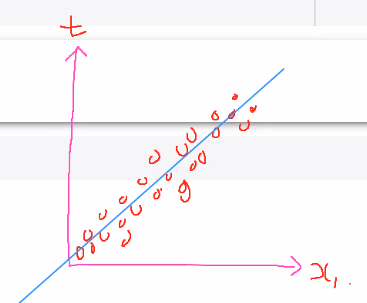

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(n_jobs=-1)  # n_jobs : 사용할 CPU 코어의 개수, -1이면 CPU의 모든 코어를 활용
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
pred = model.predict(X_valid)

시각화로 확인해 보기

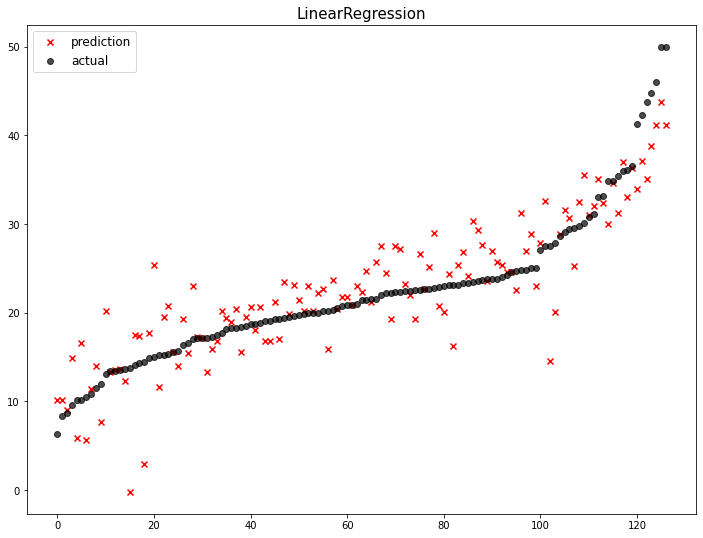

              model        mse
0  LinearRegression  16.529868


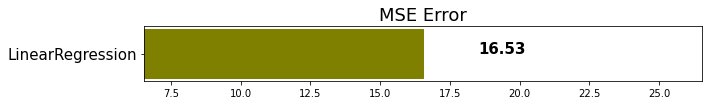

In [ ]:
mse_eval('LinearRegression', pred, y_valid)

결정 계수 지표($R^2$)
* 분류에서의 score에 해당

In [ ]:
model.score(X_valid, y_valid)

0.762286446300506

In [ ]:
model.score(X_train, y_train)

0.7333819428988515

## LinearRegression의 수식 (내적)

* 기울기(W), 편향(b)
* 기울기는 다른 말로 가중치(Weights) 

feature가 여러 개일 때 x값 뿐만 아니라 W 값도 여러개가 되고, 이 때 수식이 다음과 같이 바뀐다

$$ 
y = Wx + b
$$

$$
y = W^tx + b
$$

$$
W^t = [W_1, W_2, W_3, ..., W_n]
$$

$$ 
\hat {y} = W^tx = [W_1, W_2, W_3, ...][x_1, x_2, x_3, ...] = W_1x_1 + W_2x_2 + W_3x_3 ...
$$

----> == **내적**


### 가중치의 의미
* 입력되고 있는 데이터($x$)들의 각각의 중요도를 판단 하는 것
  * 어떠한 중요도? : 예측값($\hat{y}$)에 얼마나 많이 영향을 끼칠 것인가
* 가중치의 절대값이 커지면 예측값에 영향을 많이 미친다.
  * 모델이 복잡해 진다.
* 가중치의 절대값이 작아지면 예측값에 영향을 덜 미친다.
  * 모델이 단순해 진다.
  
  ---> 이에 따라 가중치 조절을 **복잡도 조절 방식**으로 활용할 수 있다

### 규제($\alpha$ - Regularization)

규제($\alpha$ - Regularization)를 사용하는 모델을 사용해서 가중치를 조절

* $\alpha$ : **penalty**부여 매개변수 ( 또는 람다(λ) )


### 규제 방식
1) **L2 규제(L2 Regularization) 릿지(Ridge)**
  * 각 **가중치 제곱의 합**에 규제 강도인 ($\alpha$)를 곱하여 오차에 더한다.
    * $\alpha$를 크게 하면 가중치가 더 많이 감소 (규제를 더 중요하게 생각하겠다.)
    * $\alpha$를 작게 하면 가중치가 증가한다.( 규제를 중요하게 생각하지 않음 )

$$
  E = MSE + \alpha \sum w^2
$$

2) **L1 규제(L1 Regularization) 라쏘(Lasso)**
  * **가중치의 합**을 더한 값에 규제 강도인 ($\alpha$)를 곱하여 오차에 더한다.
  * 어떤 가중치는 실제 0이 되어버린다. 즉, 모델에서 완전히 제외되는 특성이 생긴다.
    * 모델이 특성을 선택

$$
  E = MSE + \alpha \sum |w|
$$    

**L2 규제가 L1규제에 비해 안정적이라 일반적으로는 L2규제가 더 많이 사용된다.**



**Ridge**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# 값이 커질 수록 큰 규제 - 가중치가 줄어든다
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001] # 로그 스케일로 조절하는게 좋음 ( 10배 또는 1/10로 )

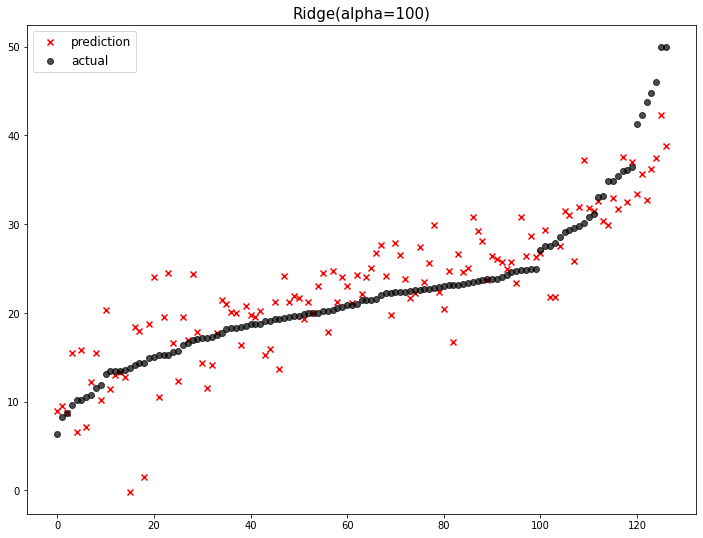

              model        mse
0  Ridge(alpha=100)  18.780640
1  LinearRegression  16.529868


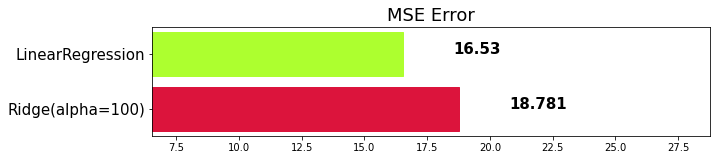

Ridge(alpha=100) Train Score : 0.7078672051912378 / Valid Score : 0.7299184260400717


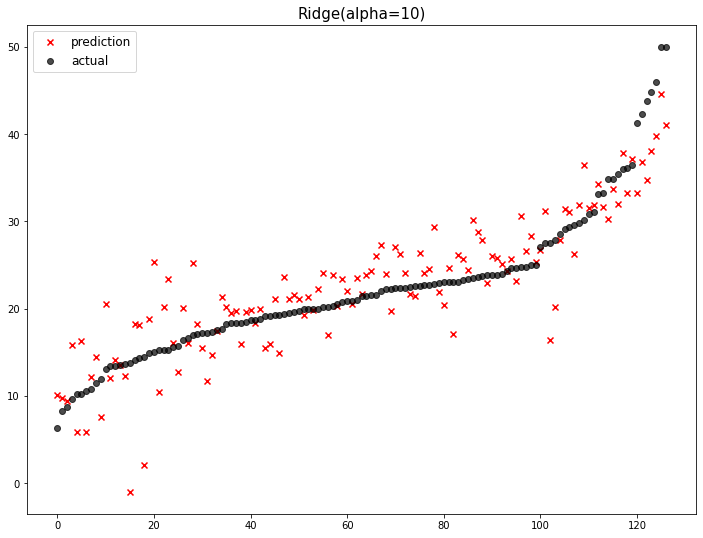

              model        mse
0  Ridge(alpha=100)  18.780640
1   Ridge(alpha=10)  17.511828
2  LinearRegression  16.529868


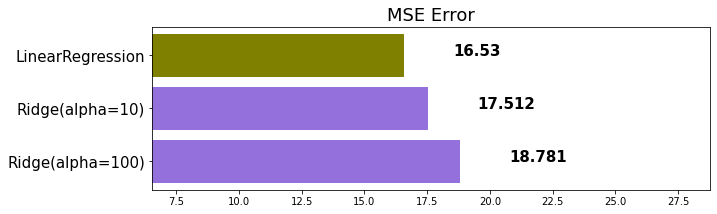

Ridge(alpha=10) Train Score : 0.7244169874385619 / Valid Score : 0.7481650219804241


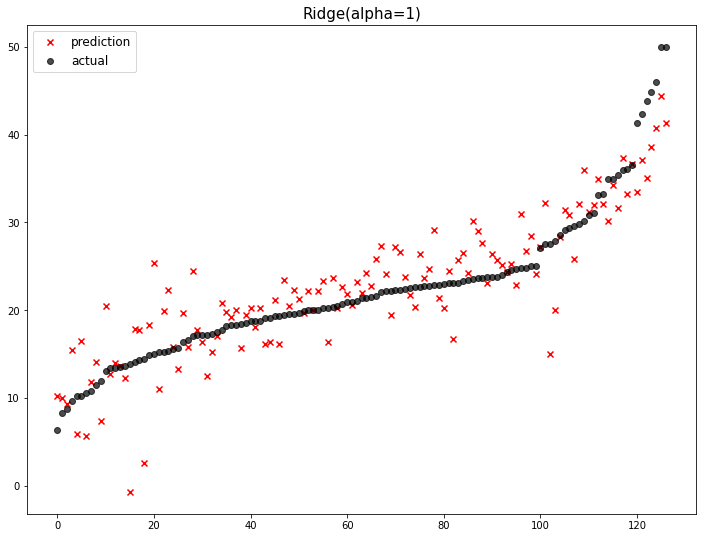

              model        mse
0  Ridge(alpha=100)  18.780640
1   Ridge(alpha=10)  17.511828
2    Ridge(alpha=1)  16.862386
3  LinearRegression  16.529868


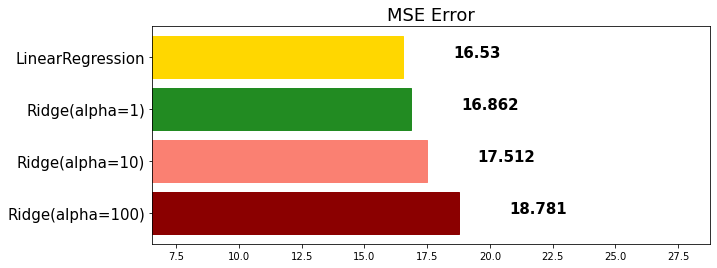

Ridge(alpha=1) Train Score : 0.7311492049804136 / Valid Score : 0.7575045562060854


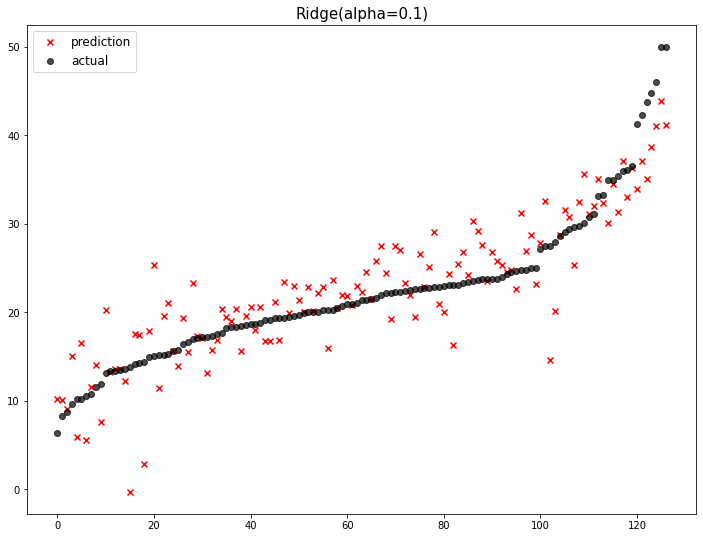

              model        mse
0  Ridge(alpha=100)  18.780640
1   Ridge(alpha=10)  17.511828
2    Ridge(alpha=1)  16.862386
3  Ridge(alpha=0.1)  16.555919
4  LinearRegression  16.529868


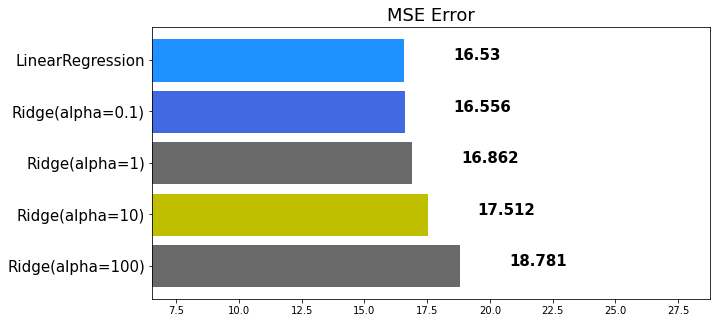

Ridge(alpha=0.1) Train Score : 0.7333147689122748 / Valid Score : 0.76191180822233


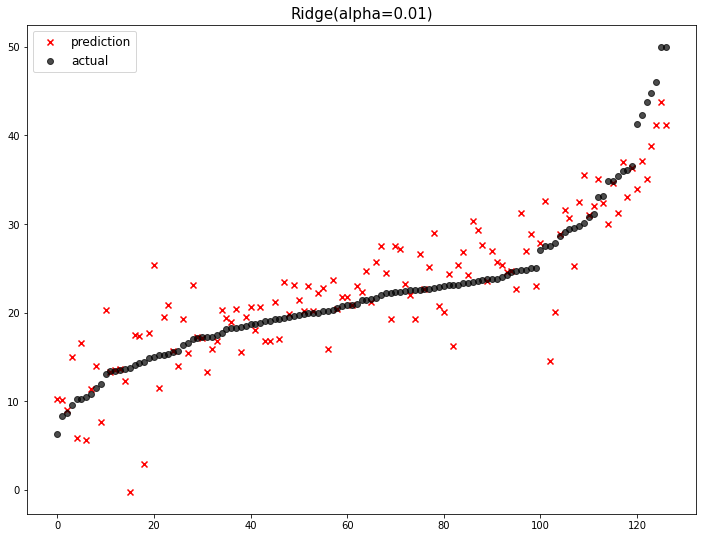

               model        mse
0   Ridge(alpha=100)  18.780640
1    Ridge(alpha=10)  17.511828
2     Ridge(alpha=1)  16.862386
3   Ridge(alpha=0.1)  16.555919
4  Ridge(alpha=0.01)  16.532026
5   LinearRegression  16.529868


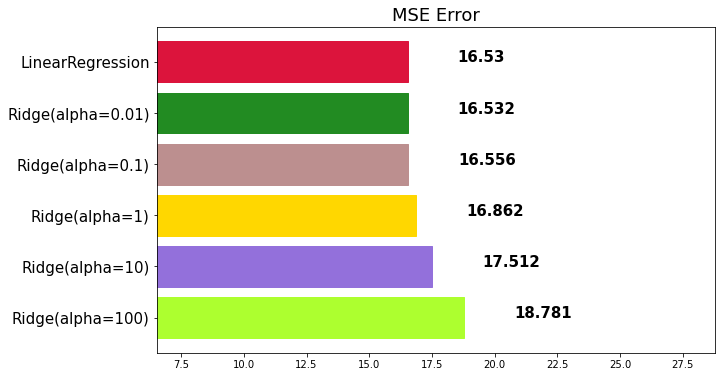

Ridge(alpha=0.01) Train Score : 0.7333811600625948 / Valid Score : 0.7622554186310635


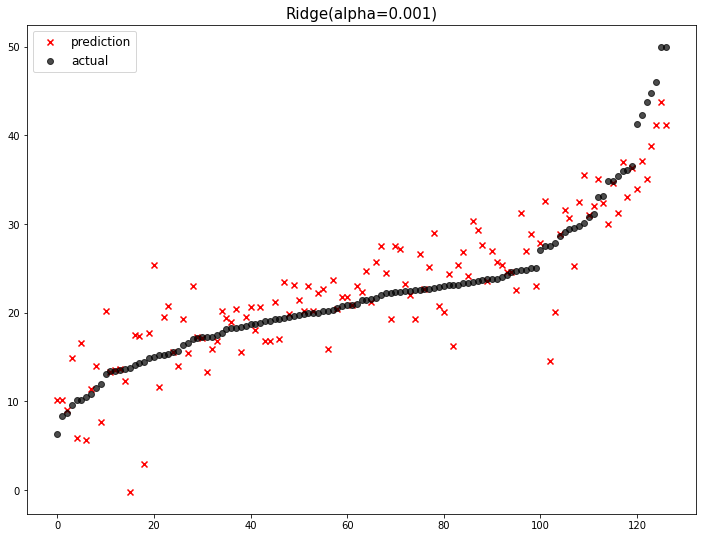

                model        mse
0    Ridge(alpha=100)  18.780640
1     Ridge(alpha=10)  17.511828
2      Ridge(alpha=1)  16.862386
3    Ridge(alpha=0.1)  16.555919
4   Ridge(alpha=0.01)  16.532026
5  Ridge(alpha=0.001)  16.530078
6    LinearRegression  16.529868


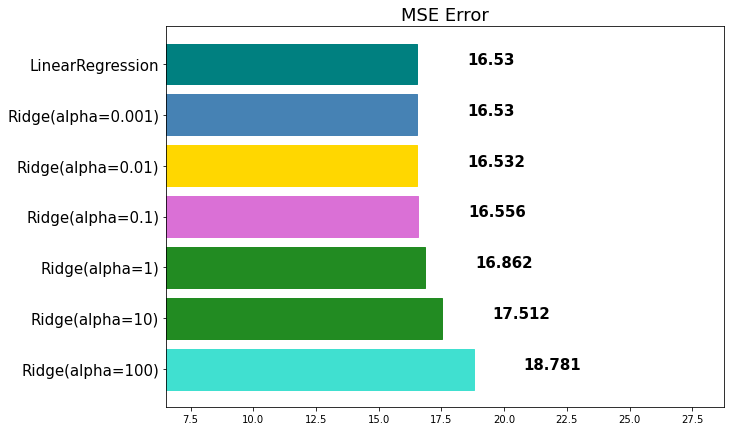

Ridge(alpha=0.001) Train Score : 0.7333819349444382 / Valid Score : 0.7622834221697531


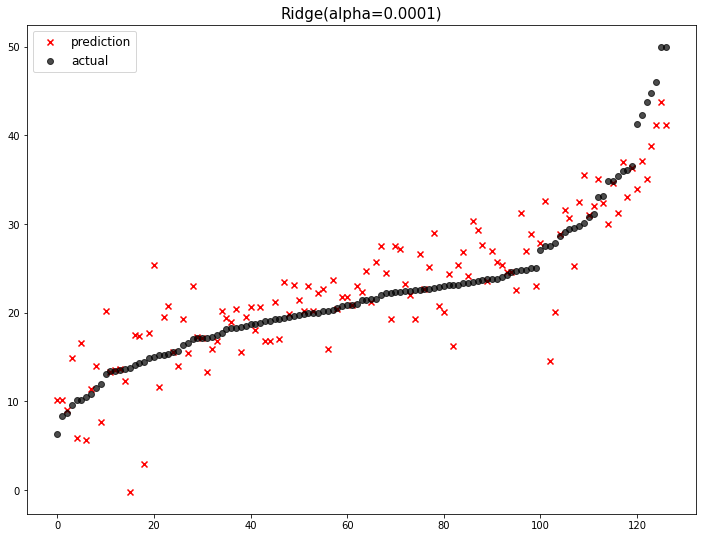

                 model        mse
0     Ridge(alpha=100)  18.780640
1      Ridge(alpha=10)  17.511828
2       Ridge(alpha=1)  16.862386
3     Ridge(alpha=0.1)  16.555919
4    Ridge(alpha=0.01)  16.532026
5   Ridge(alpha=0.001)  16.530078
6  Ridge(alpha=0.0001)  16.529889
7     LinearRegression  16.529868


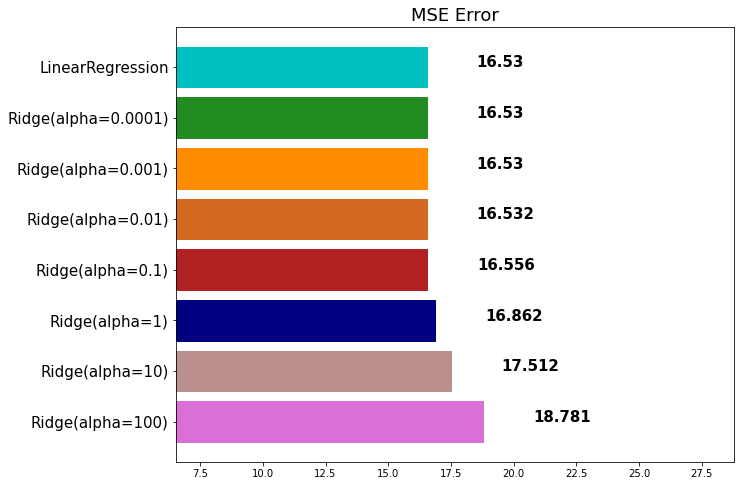

Ridge(alpha=0.0001) Train Score : 0.7333819428191797 / Valid Score : 0.7622861446901102


In [ ]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)

    pred = ridge.predict(X_valid)
    valid_score = ridge.score(X_valid, y_valid)
    train_score = ridge.score(X_train, y_train)

    mse_eval(f"Ridge(alpha={alpha})", pred, y_valid)
    print(f"Ridge(alpha={alpha}) Train Score : {train_score} / Valid Score : {valid_score}" )

Ridge에 의해서 설정된 **가중치** 확인하기

In [ ]:
ridge.coef_

array([-1.06775152e-01,  4.08822014e-02,  2.55131140e-02,  2.95314128e+00,
       -1.73813286e+01,  3.81902620e+00,  8.77440078e-03, -1.33415133e+00,
        3.14223538e-01, -1.22665440e-02, -1.03094055e+00,  7.95026455e-03,
       -5.63119465e-01])

In [ ]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns = ["feature", "coef"]

    coef_df = coef_df.sort_values(by="coef", ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])

    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

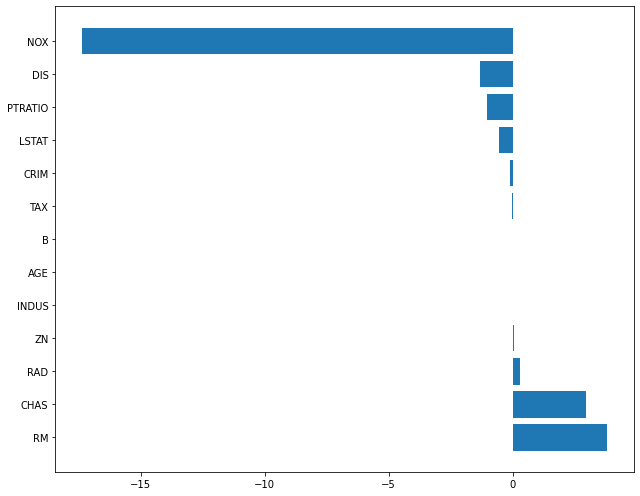

In [ ]:
plot_coef(X_train.columns, ridge.coef_)

alpha 값에 따른 coef의 차이 확인

In [ ]:
ridge100 = Ridge(alpha=100)
ridge100.fit(X_train, y_train)
ridge_pred_100 = ridge100.predict(X_valid)

ridge001 = Ridge(alpha=0.001)
ridge001.fit(X_train, y_train)
ridge_pred_001 = ridge001.predict(X_valid)

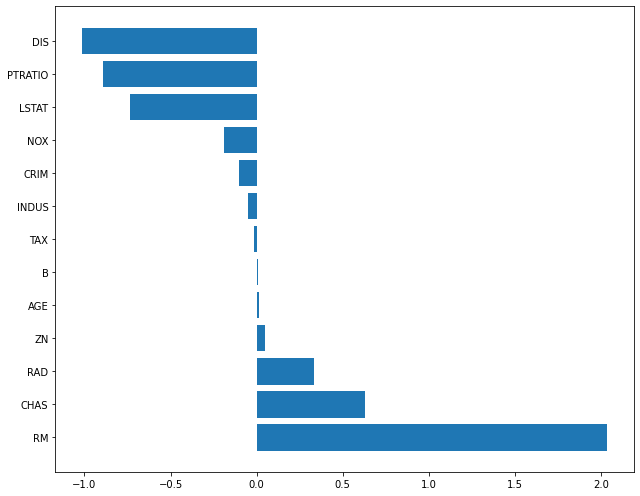

In [ ]:
# alpha가 100일 때는 가중치가 0에 가깝게 설정된 것을 확인(가중치가 줄어듦)
plot_coef(X_train.columns, ridge100.coef_)

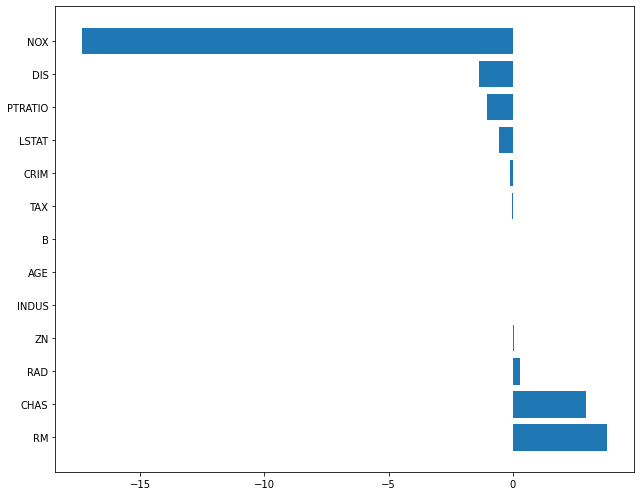

In [ ]:
# alpha가 0.001일 때는 가중치의 범위가 더 커진 것을 확인
plot_coef(X_train.columns, ridge001.coef_)

**Lasso**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

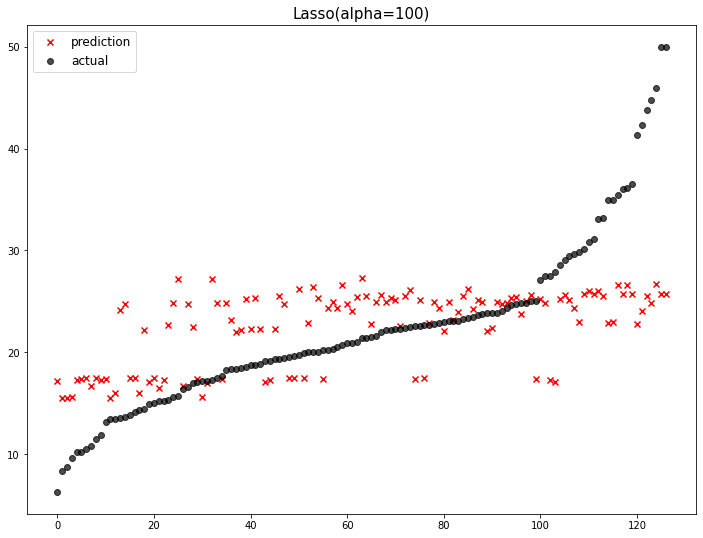

                 model        mse
0     Lasso(alpha=100)  50.536286
1     Ridge(alpha=100)  18.780640
2      Ridge(alpha=10)  17.511828
3       Ridge(alpha=1)  16.862386
4     Ridge(alpha=0.1)  16.555919
5    Ridge(alpha=0.01)  16.532026
6   Ridge(alpha=0.001)  16.530078
7  Ridge(alpha=0.0001)  16.529889
8     LinearRegression  16.529868


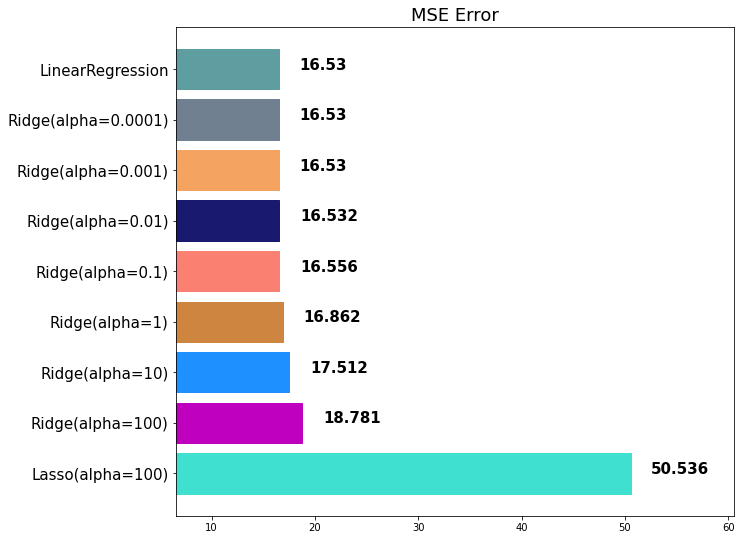

Lasso(alpha=100) Train Score : 0.2129954339160438 / Valid Score : 0.2732452531130698


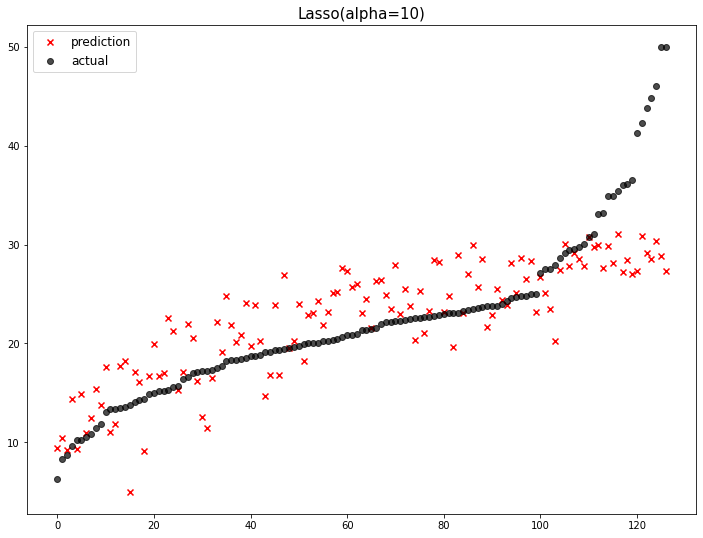

                 model        mse
0     Lasso(alpha=100)  50.536286
1      Lasso(alpha=10)  30.084555
2     Ridge(alpha=100)  18.780640
3      Ridge(alpha=10)  17.511828
4       Ridge(alpha=1)  16.862386
5     Ridge(alpha=0.1)  16.555919
6    Ridge(alpha=0.01)  16.532026
7   Ridge(alpha=0.001)  16.530078
8  Ridge(alpha=0.0001)  16.529889
9     LinearRegression  16.529868


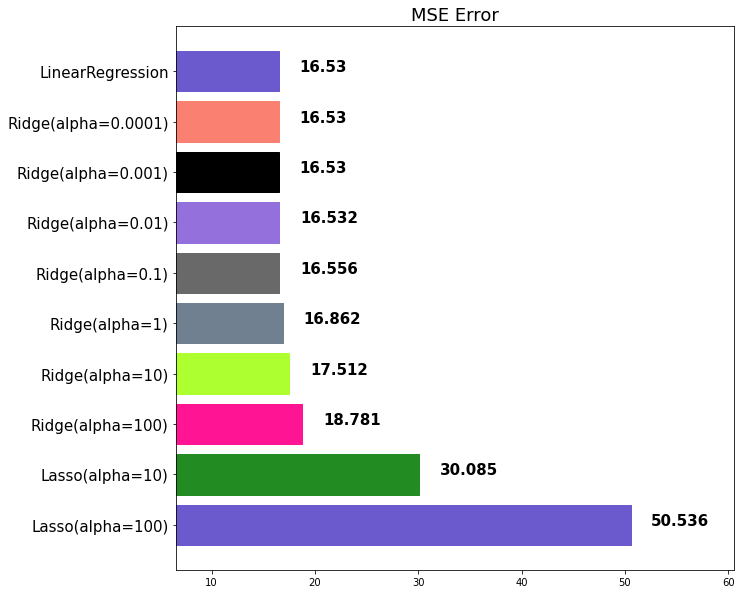

Lasso(alpha=10) Train Score : 0.523843194801159 / Valid Score : 0.5673585228754523


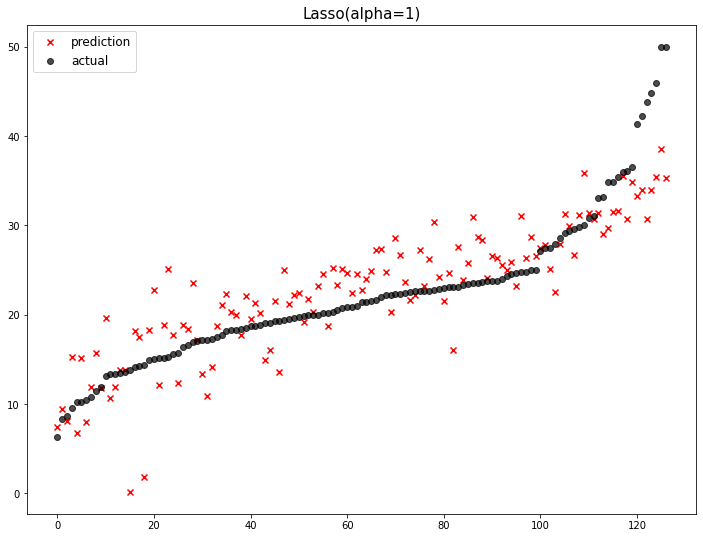

                  model        mse
0      Lasso(alpha=100)  50.536286
1       Lasso(alpha=10)  30.084555
2        Lasso(alpha=1)  21.361899
3      Ridge(alpha=100)  18.780640
4       Ridge(alpha=10)  17.511828
5        Ridge(alpha=1)  16.862386
6      Ridge(alpha=0.1)  16.555919
7     Ridge(alpha=0.01)  16.532026
8    Ridge(alpha=0.001)  16.530078
9   Ridge(alpha=0.0001)  16.529889
10     LinearRegression  16.529868


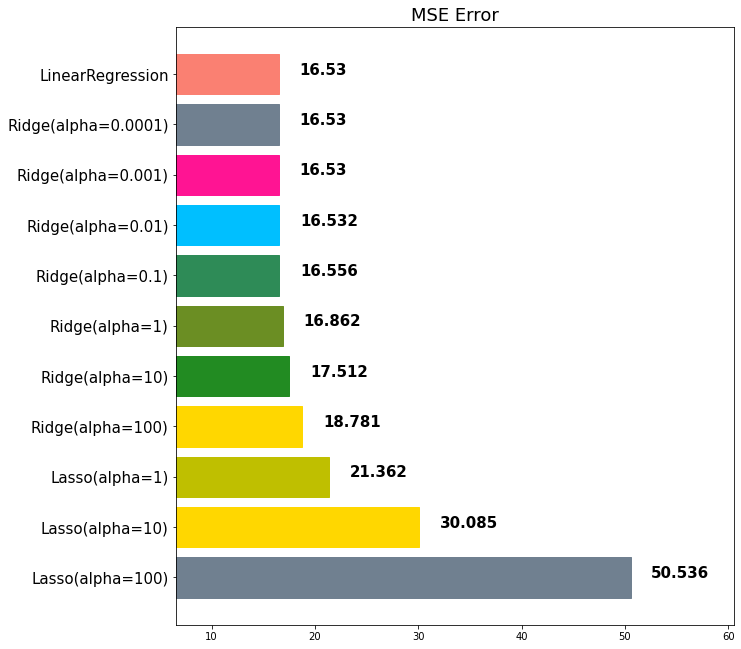

Lasso(alpha=1) Train Score : 0.6765277609840222 / Valid Score : 0.6927977349805021


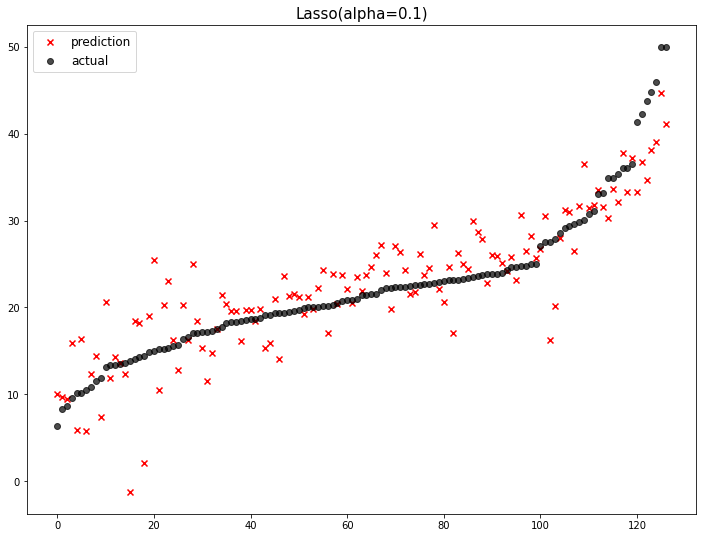

                  model        mse
0      Lasso(alpha=100)  50.536286
1       Lasso(alpha=10)  30.084555
2        Lasso(alpha=1)  21.361899
3      Ridge(alpha=100)  18.780640
4      Lasso(alpha=0.1)  17.676188
5       Ridge(alpha=10)  17.511828
6        Ridge(alpha=1)  16.862386
7      Ridge(alpha=0.1)  16.555919
8     Ridge(alpha=0.01)  16.532026
9    Ridge(alpha=0.001)  16.530078
10  Ridge(alpha=0.0001)  16.529889
11     LinearRegression  16.529868


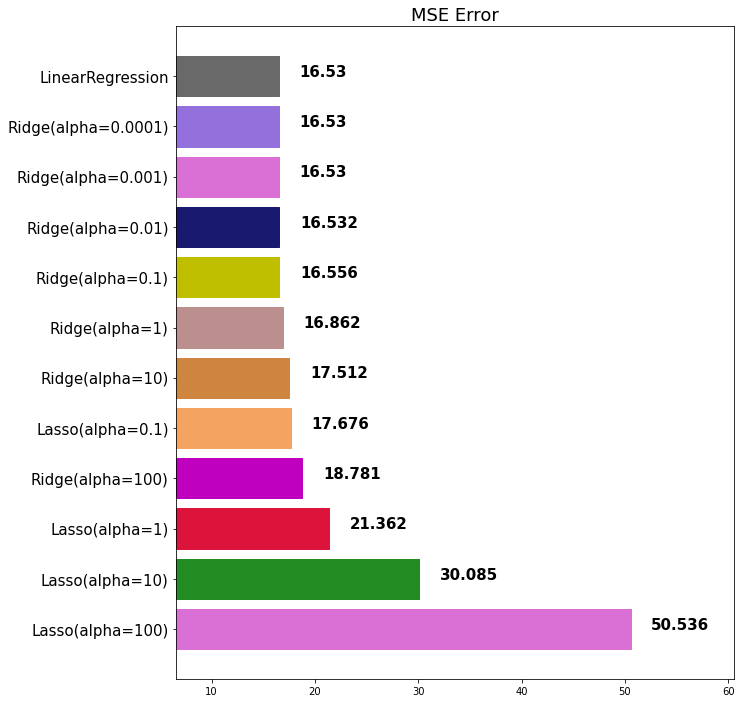

Lasso(alpha=0.1) Train Score : 0.7213175897144188 / Valid Score : 0.7458013902031827


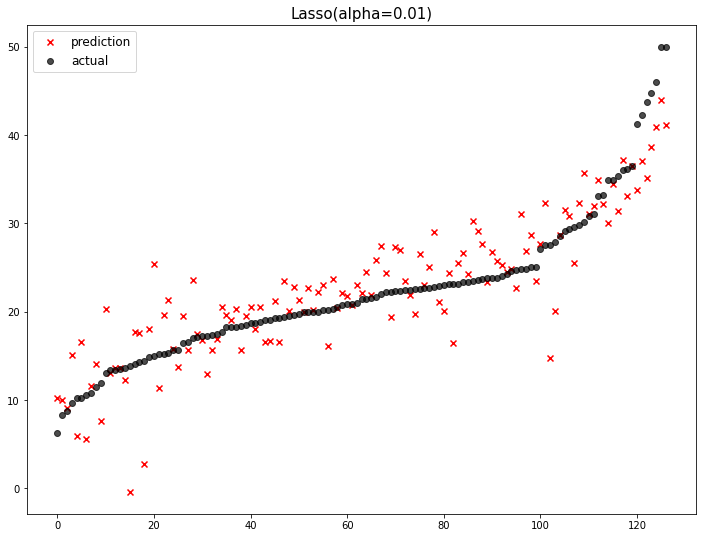

                  model        mse
0      Lasso(alpha=100)  50.536286
1       Lasso(alpha=10)  30.084555
2        Lasso(alpha=1)  21.361899
3      Ridge(alpha=100)  18.780640
4      Lasso(alpha=0.1)  17.676188
5       Ridge(alpha=10)  17.511828
6        Ridge(alpha=1)  16.862386
7     Lasso(alpha=0.01)  16.599287
8      Ridge(alpha=0.1)  16.555919
9     Ridge(alpha=0.01)  16.532026
10   Ridge(alpha=0.001)  16.530078
11  Ridge(alpha=0.0001)  16.529889
12     LinearRegression  16.529868


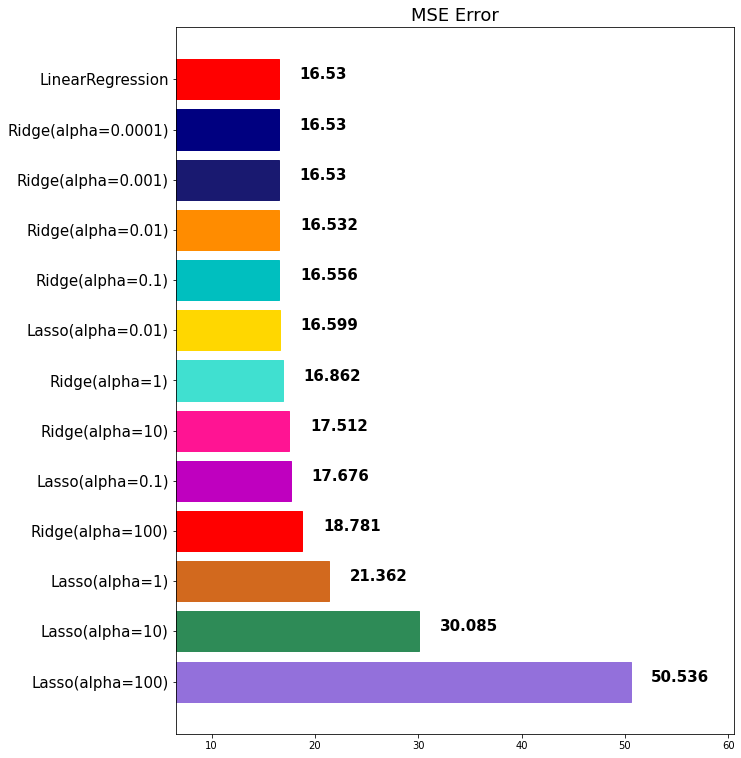

Lasso(alpha=0.01) Train Score : 0.7329674250729703 / Valid Score : 0.761288145575195


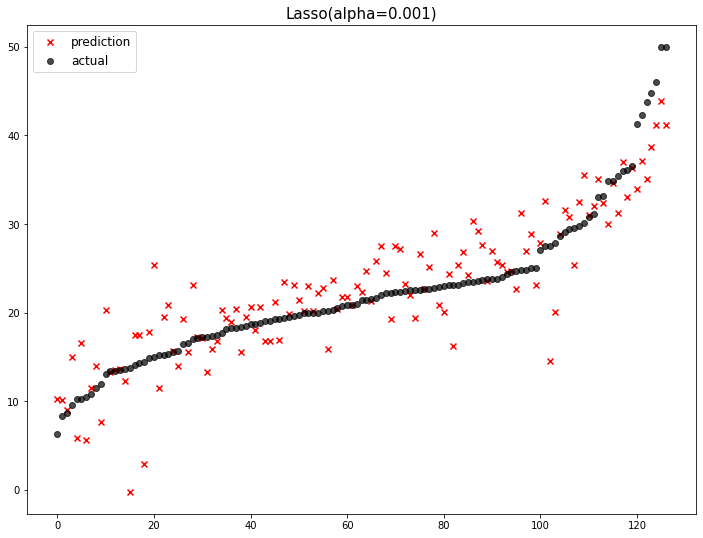

                  model        mse
0      Lasso(alpha=100)  50.536286
1       Lasso(alpha=10)  30.084555
2        Lasso(alpha=1)  21.361899
3      Ridge(alpha=100)  18.780640
4      Lasso(alpha=0.1)  17.676188
5       Ridge(alpha=10)  17.511828
6        Ridge(alpha=1)  16.862386
7     Lasso(alpha=0.01)  16.599287
8      Ridge(alpha=0.1)  16.555919
9    Lasso(alpha=0.001)  16.533185
10    Ridge(alpha=0.01)  16.532026
11   Ridge(alpha=0.001)  16.530078
12  Ridge(alpha=0.0001)  16.529889
13     LinearRegression  16.529868


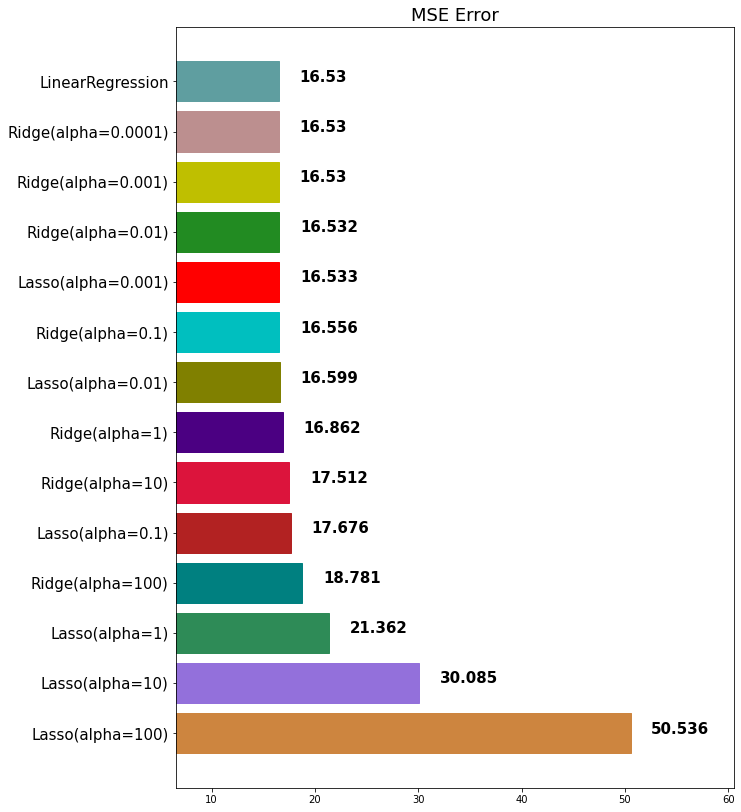

Lasso(alpha=0.001) Train Score : 0.7333777964961627 / Valid Score : 0.762238746760962


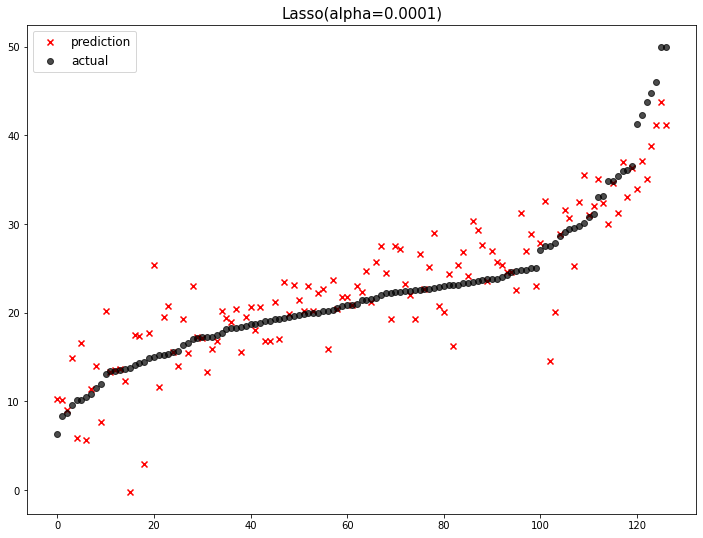

                  model        mse
0      Lasso(alpha=100)  50.536286
1       Lasso(alpha=10)  30.084555
2        Lasso(alpha=1)  21.361899
3      Ridge(alpha=100)  18.780640
4      Lasso(alpha=0.1)  17.676188
5       Ridge(alpha=10)  17.511828
6        Ridge(alpha=1)  16.862386
7     Lasso(alpha=0.01)  16.599287
8      Ridge(alpha=0.1)  16.555919
9    Lasso(alpha=0.001)  16.533185
10    Ridge(alpha=0.01)  16.532026
11  Lasso(alpha=0.0001)  16.530163
12   Ridge(alpha=0.001)  16.530078
13  Ridge(alpha=0.0001)  16.529889
14     LinearRegression  16.529868


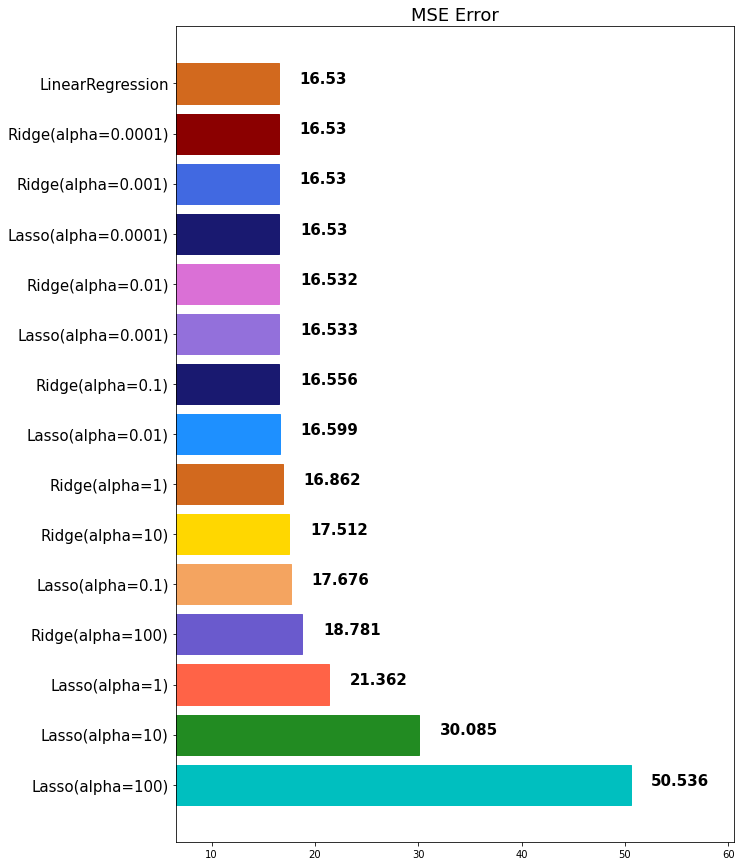

Lasso(alpha=0.0001) Train Score : 0.733381901441791 / Valid Score : 0.7622822012256383


In [ ]:
for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_valid)
    mse_eval(f"Lasso(alpha={alpha})", pred, y_valid)

    valid_score = lasso.score(X_valid, y_valid)
    train_score = lasso.score(X_train, y_train)

    print(f"Lasso(alpha={alpha}) Train Score : {train_score} / Valid Score : {valid_score}" )

In [ ]:
lasso100 = Lasso(alpha=100)
lasso100.fit(X_train, y_train)
lasso100_pred = lasso100.predict(X_valid)

lasso001 = Lasso(alpha=0.001)
lasso001.fit(X_train, y_train)
lasso001_pred = lasso001.predict(X_valid)

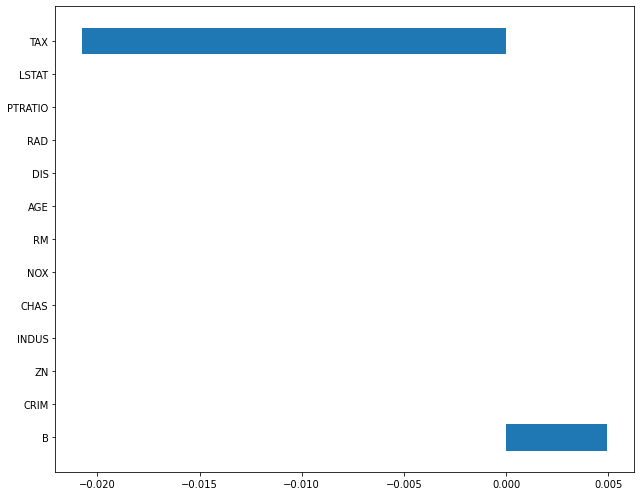

In [ ]:
# 거의 모든 데이터가 0이라는 것 확인함
plot_coef(X_train.columns, lasso100.coef_)

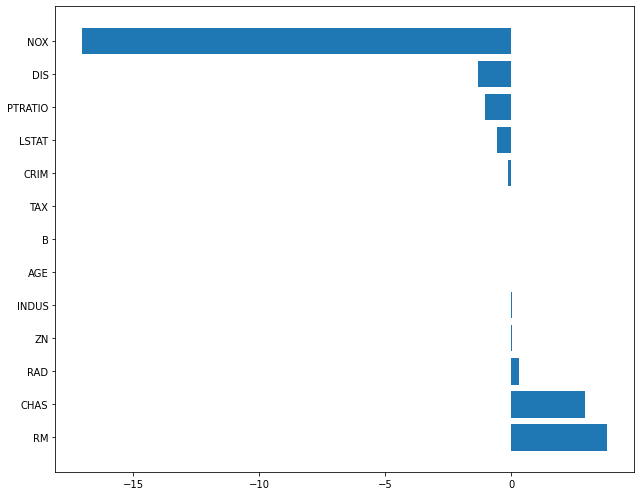

In [ ]:
# 100일 때보다 약간의 가중치가 증가했고, 범위도 훨씬 커졌음
plot_coef(X_train.columns, lasso001.coef_)

# ElasticNet

* Ridge와 Lasso의 규제 방식을 같이 사용
* L1_ratio ( default = 0.5 )  
    - alpha가 없는 대신 두 규제를 섞어서 사용할 '비율'을 설정할 수 있다
    - l1_ratio = 0 ( L2만 사용 )
    - l1_ratio = 1 ( L1만 사용 )
    - 0 < l1_ratio < 1 ( L1과 L2의 혼합 사용 )

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
ratios = [0.2, 0.5, 0.8]

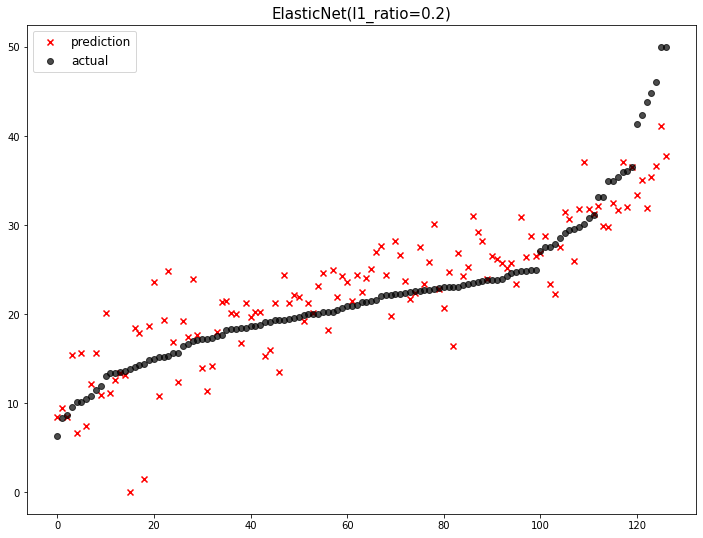

                       model        mse
0           Lasso(alpha=100)  50.536286
1            Lasso(alpha=10)  30.084555
2             Lasso(alpha=1)  21.361899
3   ElasticNet(l1_ratio=0.2)  19.571382
4           Ridge(alpha=100)  18.780640
5           Lasso(alpha=0.1)  17.676188
6            Ridge(alpha=10)  17.511828
7             Ridge(alpha=1)  16.862386
8          Lasso(alpha=0.01)  16.599287
9           Ridge(alpha=0.1)  16.555919
10        Lasso(alpha=0.001)  16.533185
11         Ridge(alpha=0.01)  16.532026
12       Lasso(alpha=0.0001)  16.530163
13        Ridge(alpha=0.001)  16.530078
14       Ridge(alpha=0.0001)  16.529889
15          LinearRegression  16.529868


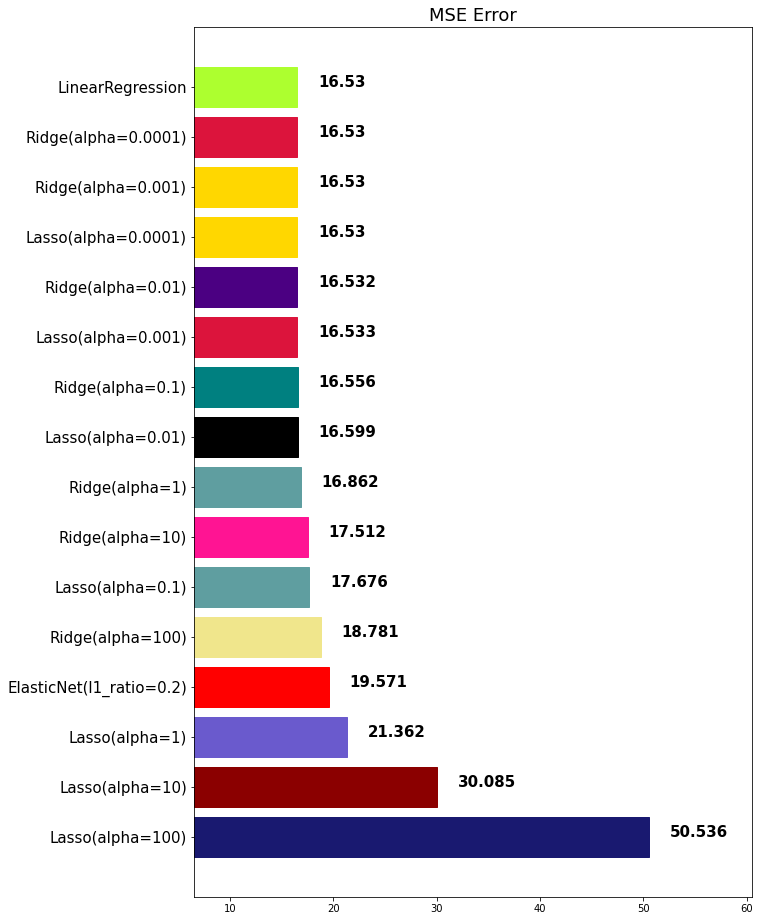

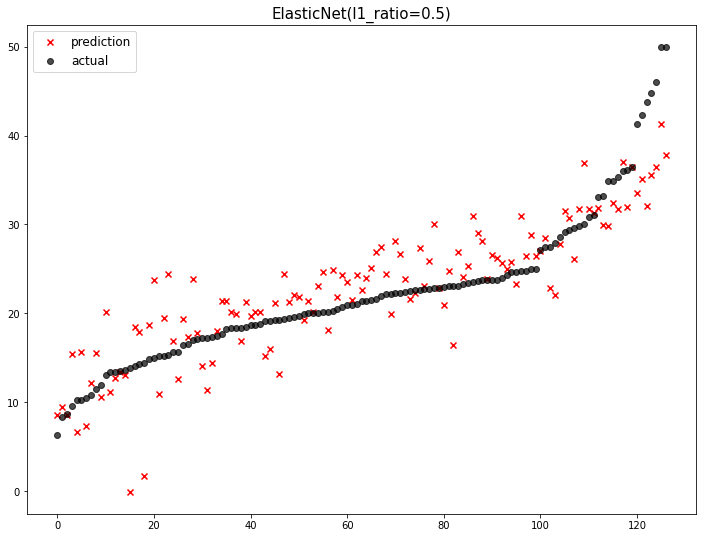

                       model        mse
0           Lasso(alpha=100)  50.536286
1            Lasso(alpha=10)  30.084555
2             Lasso(alpha=1)  21.361899
3   ElasticNet(l1_ratio=0.2)  19.571382
4   ElasticNet(l1_ratio=0.5)  19.357413
5           Ridge(alpha=100)  18.780640
6           Lasso(alpha=0.1)  17.676188
7            Ridge(alpha=10)  17.511828
8             Ridge(alpha=1)  16.862386
9          Lasso(alpha=0.01)  16.599287
10          Ridge(alpha=0.1)  16.555919
11        Lasso(alpha=0.001)  16.533185
12         Ridge(alpha=0.01)  16.532026
13       Lasso(alpha=0.0001)  16.530163
14        Ridge(alpha=0.001)  16.530078
15       Ridge(alpha=0.0001)  16.529889
16          LinearRegression  16.529868


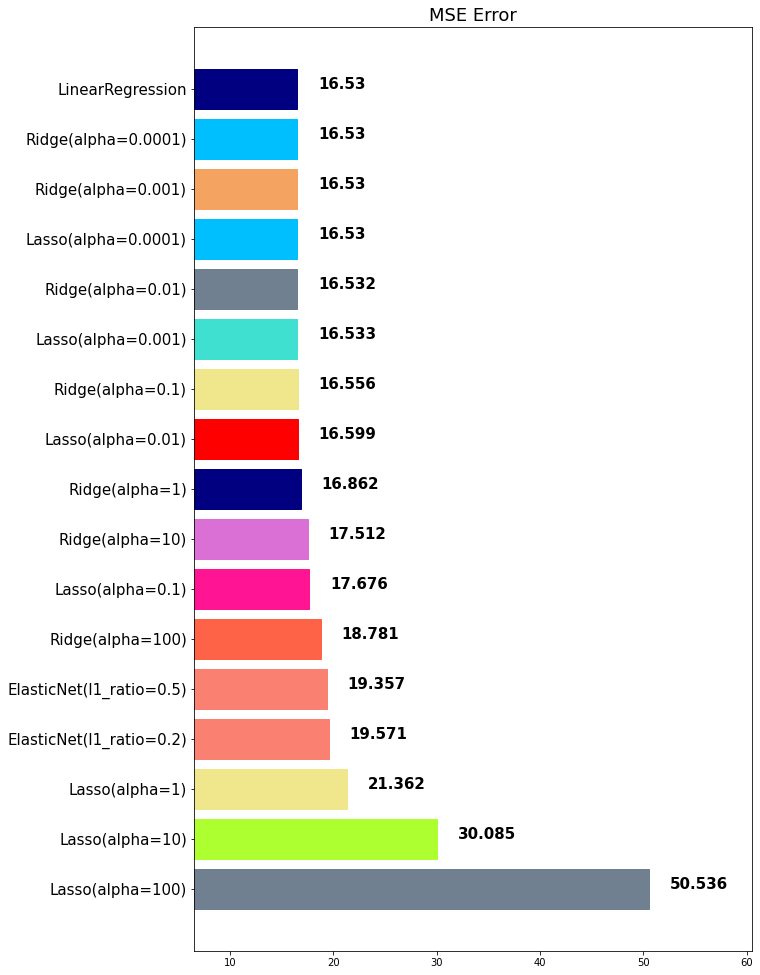

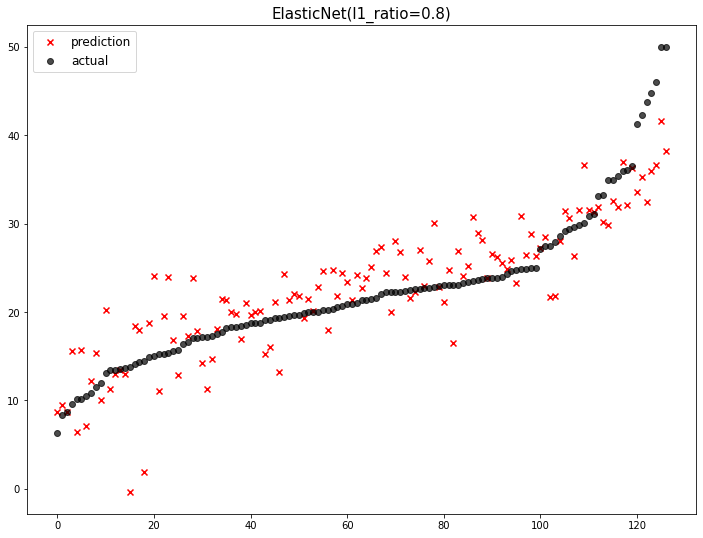

                       model        mse
0           Lasso(alpha=100)  50.536286
1            Lasso(alpha=10)  30.084555
2             Lasso(alpha=1)  21.361899
3   ElasticNet(l1_ratio=0.2)  19.571382
4   ElasticNet(l1_ratio=0.5)  19.357413
5   ElasticNet(l1_ratio=0.8)  18.975162
6           Ridge(alpha=100)  18.780640
7           Lasso(alpha=0.1)  17.676188
8            Ridge(alpha=10)  17.511828
9             Ridge(alpha=1)  16.862386
10         Lasso(alpha=0.01)  16.599287
11          Ridge(alpha=0.1)  16.555919
12        Lasso(alpha=0.001)  16.533185
13         Ridge(alpha=0.01)  16.532026
14       Lasso(alpha=0.0001)  16.530163
15        Ridge(alpha=0.001)  16.530078
16       Ridge(alpha=0.0001)  16.529889
17          LinearRegression  16.529868


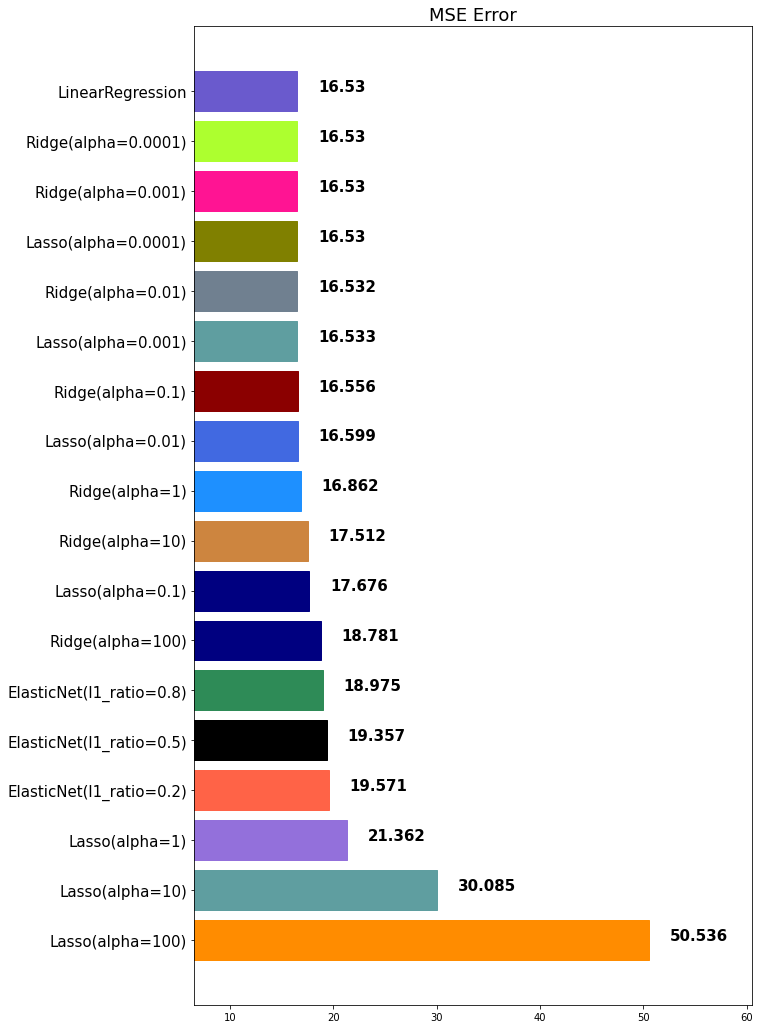

In [ ]:
for ratio in ratios:
    elastic_net = ElasticNet(alpha=0.5,  # 앞의 규제들에 넣었으므로, 일단 필요는 함 
                             l1_ratio=ratio)
    elastic_net.fit(X_train, y_train)

    pred = elastic_net.predict(X_valid)
    mse_eval("ElasticNet(l1_ratio={})".format(ratio), pred, y_valid)

# Scaling 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.788145,11.340369,11.056016,0.071240,0.552153,6.298573,68.260950,3.833282,9.459103,406.480211,18.501583,355.887995,12.581003
std,9.451880,23.396462,6.827895,0.257566,0.115398,0.694590,27.892022,2.127222,8.654466,168.554048,2.155894,93.697320,7.149862
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.079640,0.000000,5.190000,0.000000,0.449000,5.887500,45.600000,2.105250,4.000000,277.000000,17.400000,376.435000,6.820000
50%,0.229270,0.000000,8.560000,0.000000,0.524000,6.208000,76.500000,3.317500,5.000000,330.000000,19.100000,391.700000,11.250000
75%,3.504645,12.500000,18.100000,0.000000,0.624000,6.638500,93.800000,5.266000,24.000000,666.000000,20.200000,396.900000,17.030000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## StandardScaler

평균을 0, 표준편차를 1로 만들어주는 스케일러

(값의 범위가 매우 커서 최소,최대값을 정하지 않을 때 유리)

In [ ]:
type(X_train_std_scaled)

numpy.ndarray

In [ ]:
std_scaler = StandardScaler()
X_train_std_scaled = std_scaler.fit_transform(X_train)

round(pd.DataFrame(X_train_std_scaled).describe(), 2)   
# 소수점을 몇 자리까지 표현할지(올림) 결정할 수 있는 함수
# + ndarray를 dataframe 으로 변경

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.40,-0.49,-1.55,-0.28,-1.45,-3.51,-2.35,-1.27,-0.98,-1.30,-2.74,-3.80,-1.52
25%,-0.39,-0.49,-0.86,-0.28,-0.90,-0.59,-0.81,-0.81,-0.63,-0.77,-0.51,0.22,-0.81
50%,-0.38,-0.49,-0.37,-0.28,-0.24,-0.13,0.30,-0.24,-0.52,-0.45,0.28,0.38,-0.19
75%,-0.03,0.05,1.03,-0.28,0.62,0.49,0.92,0.67,1.68,1.54,0.79,0.44,0.62
max,9.02,3.79,2.45,3.61,2.77,3.58,1.14,3.90,1.68,1.81,1.62,0.44,3.42


## MinMaxScaler ( 정규화 )
최소값을 0으로, 최대값을 1로 정규화

(최소값과 최대값이 항상 존재하는 데이터의 경우 유리)

In [ ]:
minmax_scaler = MinMaxScaler()
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train)

In [ ]:
round(pd.DataFrame(X_train_minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.11,0.39,0.07,0.34,0.50,0.67,0.25,0.37,0.42,0.63,0.90,0.31
std,0.11,0.23,0.25,0.26,0.24,0.14,0.29,0.19,0.38,0.32,0.23,0.24,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.13,0.41,0.44,0.09,0.13,0.17,0.51,0.95,0.14
50%,0.00,0.00,0.30,0.00,0.29,0.48,0.76,0.20,0.17,0.27,0.69,0.99,0.27
75%,0.04,0.12,0.65,0.00,0.49,0.56,0.94,0.38,1.00,0.91,0.81,1.00,0.43
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


스케일링 결과 75% 지점에서도 데이터가 너무 쏠려있다는 것을 알 수 있음(0.04% 등)  
이럴 때는 StandartScaler가 훨씬 유리하다

## RoburtScaler
* 중앙값을 0으로 만든다
* IQR ( Inter Quantile Range ) 을 1로 변환


아웃라이어 처리에 유리함

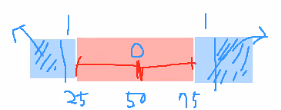

In [ ]:
robust_scaler = RobustScaler()
X_train_robust_scaled = robust_scaler.fit_transform(X_train)

In [ ]:
round(pd.DataFrame(X_train_robust_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,1.04,0.91,0.19,0.07,0.16,0.12,-0.17,0.16,0.22,0.20,-0.21,-1.75,0.13
std,2.76,1.87,0.53,0.26,0.66,0.92,0.58,0.67,0.43,0.43,0.77,4.58,0.70
min,-0.07,0.00,-0.63,0.00,-0.79,-3.12,-1.53,-0.69,-0.20,-0.37,-2.32,-19.12,-0.93
25%,-0.04,0.00,-0.26,0.00,-0.43,-0.43,-0.64,-0.38,-0.05,-0.14,-0.61,-0.75,-0.43
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.96,1.00,0.74,0.00,0.57,0.57,0.36,0.62,0.95,0.86,0.39,0.25,0.57
max,25.91,8.00,1.49,1.00,1.98,3.42,0.49,2.79,0.95,0.98,1.04,0.25,2.52
